In [1]:
import pickle
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn_pandas import DataFrameMapper
import seaborn as sns

# Read the pickled DataFrame
with open('data/consolidated_pat_tbl_tv.pickle', 'rb') as file:
    consolidated_pat_tbl = pickle.load(file)

pd.set_option('display.max_columns', None)

In [2]:
# OneHotEncode race (ethnicity)!
encoder = OneHotEncoder(sparse_output=False)
race_enc = encoder.fit_transform(consolidated_pat_tbl[['race']])
mod_df = consolidated_pat_tbl.drop('race' , axis = 1)
mod_df = pd.concat([mod_df , pd.DataFrame(
    race_enc , 
    columns = consolidated_pat_tbl[['race']].drop_duplicates().sort_values('race').values.T[0]
    )
] , axis = 1)

In [3]:
def train_test_splitter_tv(df , test_size = 0.2 , val_size = 0.2 , patient_col = 'subject_id'):
    # get all patients
    pats = df[patient_col].unique()
    # inplace shuffle
    np.random.shuffle(pats)

    # get splits
    test_pats = pats[:int(test_size*len(pats))]
    val_pats = pats[int(test_size*len(pats)):int(test_size*len(pats))+int(val_size*len(pats))]
    train_pats = pats[int(test_size*len(pats))+int(val_size*len(pats)):]

    # allocate
    df_test = df[df['subject_id'].isin(test_pats)]
    df_val = df[df['subject_id'].isin(val_pats)]
    df_train = df[df['subject_id'].isin(train_pats)]
    
    # check
    assert df_train.subject_id.nunique() + df_test.subject_id.nunique() + df_val.subject_id.nunique() == df.subject_id.nunique()
    return df_train , df_test , df_val

df_train , df_test , df_val = train_test_splitter_tv(mod_df)

In [6]:
df_train

,subject_id,temperature,heartrate,resprate,o2sat,sbp,dbp,cholesterol,sodium,lymphocyte,hemoglobin,acebutolol,amlodipine,atenolol,benazepril,candesartan,captopril,diltiazem,felodipine,irbesartan,lisinopril,moexipril,nadolol,nebivolol,nicardipine,nifedipine,olmesartan,propranolol,quinapril,ramipril,telmisartan,trandolapril,valsartan,verapamil,time_to_event,death,timediff,ASIAN,BLACK,HISPANIC,NATIVE,OTHER,WHITE
89,10002013,NaN,NaN,NaN,NaN,NaN,NaN,198.0,136.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2318.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
90,10002013,NaN,NaN,NaN,NaN,NaN,NaN,171.0,133.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2318.0,0,127.0,0.0,0.0,0.0,0.0,0.0,1.0
91,10002013,NaN,NaN,NaN,NaN,NaN,NaN,196.0,135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2318.0,0,94.0,0.0,0.0,0.0,0.0,0.0,1.0
92,10002013,NaN,NaN,NaN,NaN,NaN,NaN,187.0,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2318.0,0,115.0,0.0,0.0,0.0,0.0,0.0,1.0
93,10002013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139.0,NaN,12.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2318.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880131,19998591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
880132,19998591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138.0,NaN,9.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
880133,19998591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.0,NaN,9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
880134,19998591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135.0,NaN,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
# def impute(df):
#     _columns = df.columns.astype('str')
#     df.columns = _columns

#     # Imputation
#     imputer = SimpleImputer(strategy = 'most_frequent')
#     df = pd.DataFrame(imputer.fit_transform(df) , columns = _columns)

#     # Check for null
#     assert np.round(df.notnull().sum()/len(df)).sum() == df.shape[1]

#     # # name change
#     # df.rename(columns = {'50907':'cholesterol' , '50983':'sodium' , '51133':'lymphocyte' , '51222':'hemoglobin'} , inplace = True)

#     return df

# # use on train test val data
# df_train = impute(df_train)
# df_test = impute(df_test)
# df_val = impute(df_val)

In [29]:
def scaling(df):
    # Scaling
    scaler = StandardScaler()
    scaled_columns = [
        'cholesterol', 'sodium', 'lymphocyte', 'hemoglobin',
        'temperature', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp'
        ]

    unscaled_columns = ['acebutolol', 'amlodipine', 'atenolol', 'benazepril', 'candesartan',
        'captopril', 'diltiazem', 'felodipine', 'irbesartan', 'lisinopril',
        'moexipril', 'nadolol', 'nebivolol', 'nicardipine', 'nifedipine',
        'olmesartan', 'propranolol', 'quinapril', 'ramipril', 'telmisartan',
        'trandolapril', 'valsartan', 'verapamil', 'ASIAN', 'BLACK', 'HISPANIC', 'NATIVE',
        'OTHER', 'WHITE',]

    scale = [([col], StandardScaler()) for col in scaled_columns]
    no_scale = [(col, None) for col in unscaled_columns]

    x_mapper = DataFrameMapper(scale + no_scale)
    
    # scale data
    x = pd.DataFrame(x_mapper.fit_transform(df).astype('float32') , 
                        columns = scaled_columns + unscaled_columns
                        )
    # add subject_id and timediff separately
    x = pd.concat([x , df[['subject_id' , 'timediff']]] , axis = 1)

    # get targets
    y = df[['subject_id','time_to_event','death']].drop_duplicates().drop('subject_id', axis = 1)

    # Check
    assert x.subject_id.nunique() == len(y) , 'target and feature length mismatch' 

    return x , y

# Scale
x_train , y_train = scaling(df_train)
x_test , y_test = scaling(df_test)
x_val , y_val = scaling(df_val)

In [72]:
df_train

,subject_id,temperature,heartrate,resprate,o2sat,sbp,dbp,cholesterol,sodium,lymphocyte,hemoglobin,acebutolol,amlodipine,atenolol,benazepril,candesartan,captopril,diltiazem,felodipine,irbesartan,lisinopril,moexipril,nadolol,nebivolol,nicardipine,nifedipine,olmesartan,propranolol,quinapril,ramipril,telmisartan,trandolapril,valsartan,verapamil,time_to_event,death,timediff,ASIAN,BLACK,HISPANIC,NATIVE,OTHER,WHITE
0,10000980,0.0,0.0,0.0,0.0,0.00,0.0,306.0,142.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2062.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10000980,0.0,0.0,0.0,0.0,0.00,0.0,306.0,141.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2062.0,1,37.0,0.0,1.0,0.0,0.0,0.0,0.0
2,10000980,0.0,0.0,0.0,0.0,0.00,0.0,306.0,140.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2062.0,1,54.0,0.0,1.0,0.0,0.0,0.0,0.0
3,10000980,0.0,0.0,0.0,0.0,0.00,0.0,306.0,139.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2062.0,1,65.0,0.0,1.0,0.0,0.0,0.0,0.0
4,10000980,0.0,0.0,0.0,0.0,0.00,0.0,306.0,142.0,0.0,10.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2062.0,1,109.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880096,19998497,98.1,76.0,18.0,98.0,142.75,53.0,174.0,140.0,1.6,8.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2360.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
880097,19998497,98.1,76.0,18.0,98.0,142.75,53.0,174.0,139.0,1.6,7.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2360.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
880098,19998497,98.1,76.0,18.0,98.0,142.75,53.0,174.0,140.0,1.6,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2360.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
880099,19998497,98.1,76.0,18.0,98.0,142.75,53.0,174.0,140.0,1.6,8.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2360.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
def check_var(df):
    zero_var_cols = []
    # Check which columns have zero variance
    for _col in df.columns[:-2]:
        var = df[_col].var()
        if var == 0:
            zero_var_cols.append(_col)
    return zero_var_cols

# get rid of columns that have zero variance in training data as they won't add anything to the training
zero_var_cols = check_var(x_train)
print(f'zero_var_cols {zero_var_cols}')

# Drop the cols
x_train.drop(zero_var_cols, axis = 1, inplace = True)
x_test.drop(zero_var_cols, axis = 1, inplace = True)
x_val.drop(zero_var_cols, axis = 1, inplace = True)

zero_var_cols []


In [68]:
x_train

,cholesterol,sodium,lymphocyte,hemoglobin,temperature,heartrate,resprate,o2sat,sbp,dbp,acebutolol,amlodipine,atenolol,benazepril,candesartan,captopril,diltiazem,felodipine,irbesartan,lisinopril,moexipril,nadolol,nebivolol,nicardipine,nifedipine,olmesartan,propranolol,quinapril,ramipril,telmisartan,trandolapril,valsartan,verapamil,ASIAN,BLACK,HISPANIC,NATIVE,OTHER,WHITE,subject_id,timediff
0,2.301318,-0.314498,-0.193424,-2.732411,-1.151591,-1.119574,-1.134775,-1.122969,-1.135332,-0.632795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10000980.0,0.0
1,2.301318,-0.330105,-0.193424,-0.362918,-1.151591,-1.119574,-1.134775,-1.122969,-1.135332,-0.632795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10000980.0,37.0
2,2.301318,-0.345711,-0.193424,-0.362918,-1.151591,-1.119574,-1.134775,-1.122969,-1.135332,-0.632795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10000980.0,54.0
3,2.301318,-0.361318,-0.193424,-0.362918,-1.151591,-1.119574,-1.134775,-1.122969,-1.135332,-0.632795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10000980.0,65.0
4,2.301318,-0.314498,-0.193424,-0.268138,-1.151591,-1.119574,-1.134775,-1.122969,-1.135332,-0.632795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10000980.0,109.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531004,0.820471,-0.345711,0.279289,-0.694647,0.865355,0.660107,0.754997,0.842907,1.027148,0.191005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19998497.0,1.0
531005,0.820471,-0.361318,0.279289,-1.002681,0.865355,0.660107,0.754997,0.842907,1.027148,0.191005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19998497.0,1.0
531006,0.820471,-0.345711,0.279289,-1.073766,0.865355,0.660107,0.754997,0.842907,1.027148,0.191005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19998497.0,1.0
531007,0.820471,-0.345711,0.279289,-0.813122,0.865355,0.660107,0.754997,0.842907,1.027148,0.191005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19998497.0,1.0


In [69]:
from sympy import Matrix
Matrix(x_train_reshape[0][:,:10])

Matrix([
[2.30131816864014,  -0.31449830532074,  -0.193424254655838,   -2.73241138458252, -1.15159130096436, -1.11957406997681, -1.13477504253387, -1.12296879291534, -1.13533186912537, -0.632794916629791],
[2.30131816864014, -0.330104738473892,  -0.193424254655838,  -0.362917959690094, -1.15159130096436, -1.11957406997681, -1.13477504253387, -1.12296879291534, -1.13533186912537, -0.632794916629791],
[2.30131816864014, -0.345711171627045,  -0.193424254655838,  -0.362917959690094, -1.15159130096436, -1.11957406997681, -1.13477504253387, -1.12296879291534, -1.13533186912537, -0.632794916629791],
[2.30131816864014, -0.361317604780197,  -0.193424254655838,  -0.362917959690094, -1.15159130096436, -1.11957406997681, -1.13477504253387, -1.12296879291534, -1.13533186912537, -0.632794916629791],
[2.30131816864014,  -0.31449830532074,  -0.193424254655838,  -0.268138229846954, -1.15159130096436, -1.11957406997681, -1.13477504253387, -1.12296879291534, -1.13533186912537, -0.632794916629791],
[2.301

c:\Users\soura\Documents\ECMM451\project_env\lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\soura\Documents\ECMM451\project_env\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


<Axes: >

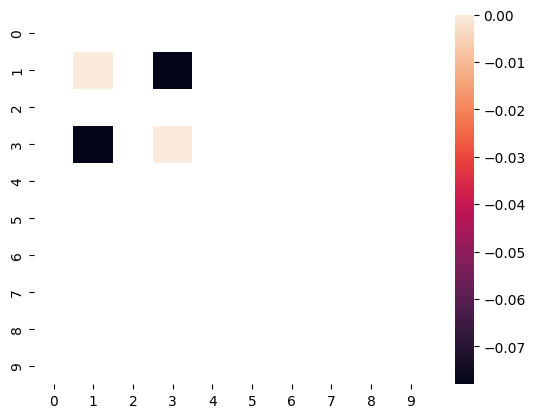

In [60]:
sns.heatmap(
    np.corrcoef(x_train_reshape[10000][: , :10],rowvar = False) - np.corrcoef(x_train_reshape[10001][: , :10], rowvar = False)
    )

In [23]:
def feature_reshape(df , subject_col):
    pats = list(df[subject_col].unique())

    df_reshape = []

    # selecting individual patients in the df
    for pat in pats:
        pat_df = df[df[subject_col]==pat]
        df_reshape.append(pat_df.drop(subject_col , axis = 1).to_numpy())

    return np.array(df_reshape, dtype = 'object')

# Create variable length 3D representations
x_train_reshape = feature_reshape(x_train , 'subject_id')
x_test_reshape = feature_reshape(x_test , 'subject_id')
x_val_reshape = feature_reshape(x_val , 'subject_id')

In [44]:
# Pickle the DataFrame
with open('data/x_train_reshape.pickle', 'wb') as file:
    pickle.dump(x_train_reshape, file)

with open('data/x_test_reshape.pickle', 'wb') as file:
    pickle.dump(x_test_reshape, file)

with open('data/x_val_reshape.pickle', 'wb') as file:
    pickle.dump(x_val_reshape, file)

c:\Users\soura\Documents\ECMM451\project_env\lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\soura\Documents\ECMM451\project_env\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


<Axes: >

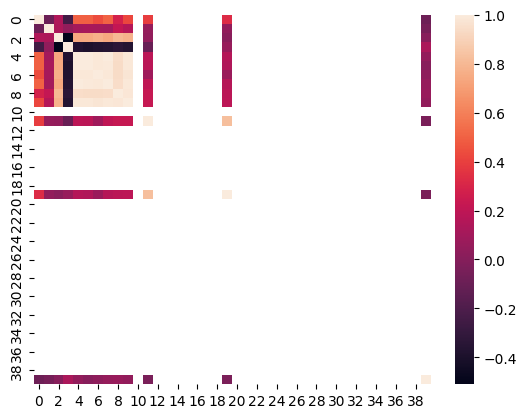

In [86]:
sns.heatmap(np.corrcoef(x_test_reshape[300], rowvar = False))

c:\Users\soura\Documents\ECMM451\project_env\lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\soura\Documents\ECMM451\project_env\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


<Axes: >

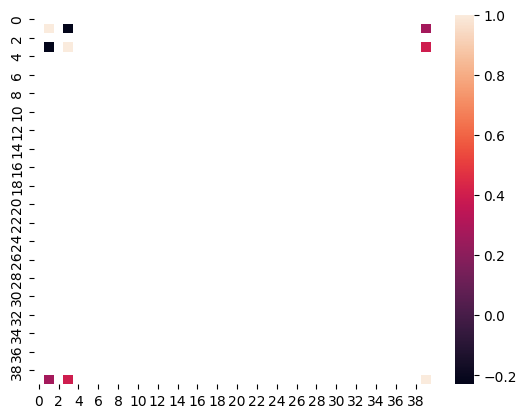

In [70]:
sns.heatmap(np.corrcoef(x_test_reshape[100] , rowvar = False))

-----

In [ ]:
# def feature_reshape(df, group_column = 0):
#     '''
#     Convert to 3D array
#     '''
#     # convert to numpy
#     df_arr = df.to_numpy()

#     # Step 1: Sort the array based on the group_column
#     sorted_data = df_arr[df_arr[:, group_column].argsort()]

#     # Step 2: Find unique values in the group_column
#     group_values, group_counts = np.unique(sorted_data[:, group_column], return_counts=True)

#     # Step 3: Use np.split() to split the sorted_data into separate arrays based on the unique values
#     grouped_data = np.split(sorted_data, np.cumsum(group_counts)[:-1])

#     # Step 4: Reshape the resulting arrays into a 3D matrix
#     result = np.array(grouped_data , dtype = 'object')

#     result_new = []

#     # # remove subject id
#     # for pat_img in result:
#     #     pat_img = pat_img[: , :-1]
#     #     result_new.append(pat_img)
    
#     # return np.array(result_new , dtype = 'object')
#     return np.array(result , dtype = 'object')

In [ ]:
# # Create variable length 3D representations
# x_train_reshape = feature_reshape(x_train , group_column = -1)
# x_test_reshape = feature_reshape(x_test , group_column = -1)
# x_val_reshape = feature_reshape(x_val , group_column = -1)